In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dropout

tr = 669
te = 156
day = 10

c:\users\watso\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\watso\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\watso\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\watso\appd

In [3]:
df = pd.read_csv("stock108_111.csv")
df

,date,Closing price
0,2019/1/2,219.5
1,2019/1/3,215.5
2,2019/1/4,208.0
3,2019/1/7,213.0
4,2019/1/8,211.0
...,...,...
824,2022/5/27,530.0
825,NaN,NaN
826,NaN,NaN
827,NaN,NaN


In [4]:
train = df['Closing price']
train = train.iloc[0:tr]
train,train.shape

(0      219.5
 1      215.5
 2      208.0
 3      213.0
 4      211.0
        ...  
 664    594.0
 665    580.0
 666    580.0
 667    574.0
 668    572.0
 Name: Closing price, Length: 669, dtype: float64,
 (669,))

In [5]:
test = df['Closing price']
test = test.iloc[tr:825]
test,test.shape

(669    572.0
 670    571.0
 671    580.0
 672    575.0
 673    575.0
        ...  
 820    528.0
 821    520.0
 822    524.0
 823    514.0
 824    530.0
 Name: Closing price, Length: 156, dtype: float64,
 (156,))

In [6]:
train_set = np.array(train)
test_set = np.array(test)
type(train),type(train_set)

(pandas.core.series.Series, numpy.ndarray)

In [7]:
train_set = train_set.reshape(tr,-1)
test_set = test_set.reshape(te,-1)
train_set.shape,test_set.shape

((669, 1), (156, 1))

In [8]:
test_set

array([[572.],
       [571.],
       [580.],
       [575.],
       [575.],
       [571.],
       [573.],
       [600.],
       [590.],
       [600.],
       [598.],
       [596.],
       [600.],
       [593.],
       [599.],
       [599.],
       [595.],
       [590.],
       [590.],
       [592.],
       [592.],
       [587.],
       [600.],
       [602.],
       [611.],
       [612.],
       [606.],
       [604.],
       [608.],
       [610.],
       [610.],
       [613.],
       [618.],
       [615.],
       [612.],
       [603.],
       [603.],
       [596.],
       [593.],
       [596.],
       [600.],
       [615.],
       [608.],
       [600.],
       [607.],
       [602.],
       [608.],
       [605.],
       [601.],
       [599.],
       [600.],
       [605.],
       [607.],
       [598.],
       [597.],
       [600.],
       [606.],
       [604.],
       [606.],
       [615.],
       [616.],
       [615.],
       [631.],
       [656.],
       [650.],
       [644.],
       [63

In [9]:
sc = MinMaxScaler(feature_range=(0, 1)) 
train_scaled = sc.fit_transform(train_set) 
test_scaled = sc.transform(test_set)
train_scaled,test_scaled

(array([[0.02473118],
        [0.01612903],
        [0.        ],
        [0.01075269],
        [0.00645161],
        [0.01612903],
        [0.0172043 ],
        [0.02688172],
        [0.02258065],
        [0.02795699],
        [0.02043011],
        [0.02688172],
        [0.02258065],
        [0.02795699],
        [0.03225806],
        [0.02688172],
        [0.0311828 ],
        [0.03870968],
        [0.04516129],
        [0.0311828 ],
        [0.02795699],
        [0.04301075],
        [0.04731183],
        [0.04516129],
        [0.04086022],
        [0.04086022],
        [0.04731183],
        [0.04516129],
        [0.05698925],
        [0.06129032],
        [0.06129032],
        [0.06451613],
        [0.06774194],
        [0.06666667],
        [0.05913978],
        [0.05376344],
        [0.05591398],
        [0.05591398],
        [0.04731183],
        [0.0483871 ],
        [0.05913978],
        [0.06236559],
        [0.05698925],
        [0.06666667],
        [0.07096774],
        [0

In [10]:
x_train = []
y_train = []
x_test = []
y_test = []

In [11]:
for i in range(day, len(train_scaled)):
    x_train.append(train_scaled[i - day:i, 0])
    y_train.append(train_scaled[i, 0])

In [12]:
x_train[20],y_train[20]

(array([0.02795699, 0.04301075, 0.04731183, 0.04516129, 0.04086022,
        0.04086022, 0.04731183, 0.04516129, 0.05698925, 0.06129032]),
 0.061290322580645096)

In [13]:
np.random.seed(5)
np.random.shuffle(x_train)
np.random.seed(5)
np.random.shuffle(y_train)
tf.random.set_random_seed(5)

In [14]:
x_train[20],y_train[20]

(array([0.20645161, 0.18709677, 0.18494624, 0.18817204, 0.18494624,
        0.19354839, 0.19032258, 0.19569892, 0.20752688, 0.18709677]),
 0.1881720430107527)

In [15]:
#len(x_train),x_test[0]

In [16]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [17]:
for i in range(day, len(test_set)):
    x_test.append(test_scaled[i - day:i, 0])
    y_test.append(test_scaled[i, 0])

In [18]:
x_test[20],y_test[20]

(array([0.82580645, 0.81505376, 0.84301075, 0.84731183, 0.86666667,
        0.8688172 , 0.85591398, 0.8516129 , 0.86021505, 0.86451613]),
 0.864516129032258)

In [19]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [20]:
x_train = np.reshape(x_train, (x_train.shape[0],day,1))
x_test = np.reshape(x_test, (x_test.shape[0],day,1))
#x_train = sequence.pad_sequences(x_train, maxlen=5)
#x_test = sequence.pad_sequences(x_test, maxlen=5)

In [21]:
x_train.shape,x_test.shape

((659, 10, 1), (146, 10, 1))

In [22]:
model = Sequential()
model.add(LSTM(units=100,return_sequences=True,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 80,activation='relu'))
model.add(Dense(1, activation='sigmoid'))


Instructions for updating:
Colocations handled automatically by placer.


In [23]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
model.summary()
model.fit(x_train,y_train,batch_size=32,epochs=100)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10, 100)           40800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 80)                57920     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 81        
Total params: 98,801
Trainable params: 98,801
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
659/659 [==============================] - 1s 1ms/step - loss: 0.0783 - accuracy: 0.0015
Epoch 2/100
659/659 [==============================] - 0s 377us/step - loss: 0.0132 - accuracy: 0.0

659/659 [==============================] - 0s 389us/step - loss: 7.7126e-04 - accuracy: 0.0015
Epoch 68/100
659/659 [==============================] - 0s 413us/step - loss: 7.8946e-04 - accuracy: 0.0015
Epoch 69/100
659/659 [==============================] - 0s 389us/step - loss: 7.6749e-04 - accuracy: 0.0015
Epoch 70/100
659/659 [==============================] - 0s 381us/step - loss: 7.8618e-04 - accuracy: 0.0015
Epoch 71/100
659/659 [==============================] - 0s 386us/step - loss: 7.3975e-04 - accuracy: 0.0015
Epoch 72/100
659/659 [==============================] - 0s 409us/step - loss: 7.2366e-04 - accuracy: 0.0015
Epoch 73/100
659/659 [==============================] - 0s 392us/step - loss: 7.8027e-04 - accuracy: 0.0015
Epoch 74/100
659/659 [==============================] - 0s 425us/step - loss: 8.4619e-04 - accuracy: 0.0015
Epoch 75/100
659/659 [==============================] - 0s 383us/step - loss: 7.8463e-04 - accuracy: 0.0015
Epoch 76/100
659/659 [===================

In [24]:
predict_stock = model.predict(x_test)
predict_stock = sc.inverse_transform(predict_stock)

In [25]:
type(predict_stock)

numpy.ndarray

In [26]:
test_set[0:te-day].shape

(146, 1)

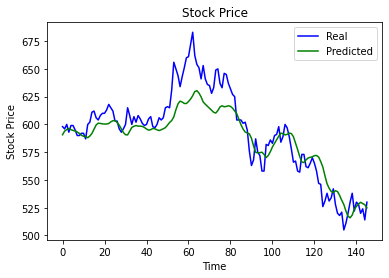

In [27]:
plt.plot(test_set[day:te], color = 'blue', label = 'Real')
plt.plot(predict_stock, color = 'green', label = 'Predicted')
plt.title('Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [28]:
model.save('stock_3.h')